# Fetching Data from Coin Market Cap webpage for latest data updated every 30 seconds (https://pro.coinmarketcap.com/account/) 

market_cap: CoinMarketCap's market cap rank as outlined in our methodology.
market_cap_strict: A strict market cap sort (latest trade price x circulating supply).
name: The cryptocurrency name.
symbol: The cryptocurrency symbol.
date_added: Date cryptocurrency was added to the system.
price: latest average trade price across markets.
circulating_supply: approximate number of coins currently in circulation.
total_supply: approximate total amount of coins in existence right now (minus any coins that have been verifiably burned).
max_supply: our best approximation of the maximum amount of coins that will ever exist in the lifetime of the currency.
num_market_pairs: number of market pairs across all exchanges trading each currency.
market_cap_by_total_supply_strict: market cap by total supply.
volume_24h: rolling 24 hour adjusted trading volume.
volume_7d: rolling 24 hour adjusted trading volume.
volume_30d: rolling 24 hour adjusted trading volume.
percent_change_1h: 1 hour trading price percentage change for each currency.
percent_change_24h: 24 hour trading price percentage change for each currency.
percent_change_7d: 7 day trading price percentage change for each currency.

In [187]:
# import libraries
import requests
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from coinmarket_config import API_Key
import numpy as np
import pymongo
from pymongo import MongoClient
import certifi
from mongo2_config import mongo_uri
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
# %matplotlib notebook
import datetime
from datetime import datetime
from datetime import timezone

In [97]:
api_endpoint = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?CMC_PRO_API_KEY='
api_endpoint += API_Key

In [98]:
requests.get(api_endpoint).json()

{'status': {'timestamp': '2022-01-28T01:54:04.790Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 153,
  'credit_count': 1,
  'notice': None,
  'total_count': 9279},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 9119,
   'date_added': '2013-04-28T00:00:00.000Z',
   'tags': ['mineable',
    'pow',
    'sha-256',
    'store-of-value',
    'state-channel',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'binance-labs-portfolio',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'galaxy-digital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfolio

In [99]:
data_retrieved = requests.get(api_endpoint).json()
data_retrieved

{'status': {'timestamp': '2022-01-28T01:54:41.074Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 25,
  'credit_count': 1,
  'notice': None,
  'total_count': 9279},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 9119,
   'date_added': '2013-04-28T00:00:00.000Z',
   'tags': ['mineable',
    'pow',
    'sha-256',
    'store-of-value',
    'state-channel',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'binance-labs-portfolio',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'galaxy-digital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfolio'

In [100]:
cryptodata = data_retrieved['data']

In [101]:
cryptodata

[{'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'slug': 'bitcoin',
  'num_market_pairs': 9119,
  'date_added': '2013-04-28T00:00:00.000Z',
  'tags': ['mineable',
   'pow',
   'sha-256',
   'store-of-value',
   'state-channel',
   'coinbase-ventures-portfolio',
   'three-arrows-capital-portfolio',
   'polychain-capital-portfolio',
   'binance-labs-portfolio',
   'blockchain-capital-portfolio',
   'boostvc-portfolio',
   'cms-holdings-portfolio',
   'dcg-portfolio',
   'dragonfly-capital-portfolio',
   'electric-capital-portfolio',
   'fabric-ventures-portfolio',
   'framework-ventures-portfolio',
   'galaxy-digital-portfolio',
   'huobi-capital-portfolio',
   'alameda-research-portfolio',
   'a16z-portfolio',
   '1confirmation-portfolio',
   'winklevoss-capital-portfolio',
   'usv-portfolio',
   'placeholder-ventures-portfolio',
   'pantera-capital-portfolio',
   'multicoin-capital-portfolio',
   'paradigm-portfolio'],
  'max_supply': 21000000,
  'circulating_supply': 18941662,
  '

# Converting the json data into a Dataframe

In [102]:
crypto_data_df = pd.json_normalize(data_retrieved, record_path =['data'])
crypto_data_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9119,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.894166e+07,1.894166e+07,...,-40.550818,6.987511e+11,42.1125,7.746825e+11,2022-01-28T01:53:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5481,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.193392e+08,1.193392e+08,...,-45.139131,2.861513e+11,17.2490,2.861513e+11,2022-01-28T01:53:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,27082,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.816863e+10,8.007489e+10,...,0.033029,7.819076e+10,4.7120,8.009757e+10,2022-01-28T01:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,657,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.651168e+08,1.651168e+08,...,-27.978262,6.355859e+10,3.8302,6.355859e+10,2022-01-28T01:53:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,2889,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.946896e+10,4.946896e+10,...,-0.024486,4.944419e+10,2.9797,4.944419e+10,2022-01-28T01:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2777,IoTeX,IOTX,iotex,72,2018-05-25T00:00:00.000Z,"[platform, iot, binance-smart-chain, hashkey-c...",1.000000e+10,9.540779e+09,9.626124e+09,...,11.620291,6.977263e+08,0.0421,7.313095e+08,2022-01-28T01:53:00.000Z,NaN,NaN,NaN,NaN,NaN
96,2577,Ravencoin,RVN,ravencoin,93,2018-03-10T00:00:00.000Z,"[mineable, pow, platform, crowdfunding]",2.100000e+10,1.047329e+10,1.047329e+10,...,-41.811215,6.848086e+08,0.0413,1.373110e+09,2022-01-28T01:53:00.000Z,NaN,NaN,NaN,NaN,NaN
97,5777,renBTC,RENBTC,renbtc,37,2020-06-28T00:00:00.000Z,"[defi, binance-smart-chain, wrapped-tokens, fa...",1.369800e+04,1.801553e+04,1.801553e+04,...,-40.661495,6.639725e+08,0.0400,5.048476e+08,2022-01-28T01:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xeb4c2781e4eba804ce9a9803c67d0893436bb27d
98,1808,OMG Network,OMG,omg,263,2017-07-14T00:00:00.000Z,"[medium-of-exchange, payments, scaling, state-...",1.402454e+08,1.402454e+08,1.402454e+08,...,-68.008456,5.972404e+08,0.0360,5.972404e+08,2022-01-28T01:53:00.000Z,NaN,NaN,NaN,NaN,NaN


In [103]:
# Replace NaN as '0'
crypto_data_df.isnull().sum().sum()
crypto_data_df.isna().sum()

id                                      0
name                                    0
symbol                                  0
slug                                    0
num_market_pairs                        0
date_added                              0
tags                                    0
max_supply                             41
circulating_supply                      0
total_supply                            0
platform                              100
cmc_rank                                0
self_reported_circulating_supply       88
self_reported_market_cap               88
last_updated                            0
quote.USD.price                         0
quote.USD.volume_24h                    0
quote.USD.volume_change_24h             0
quote.USD.percent_change_1h             0
quote.USD.percent_change_24h            0
quote.USD.percent_change_7d             0
quote.USD.percent_change_30d            0
quote.USD.percent_change_60d            0
quote.USD.percent_change_90d      

In [104]:
# change data to datetime format
crypto_data_df['date_added'] = pd.to_datetime(crypto_data_df['date_added']).dt.tz_localize(None)
crypto_data_df['quote.USD.last_updated'] = pd.to_datetime(crypto_data_df['quote.USD.last_updated']).dt.tz_localize(None)
crypto_data_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9119,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.894166e+07,1.894166e+07,...,-40.550818,6.987511e+11,42.1125,7.746825e+11,2022-01-28 01:53:00,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5481,2015-08-07,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.193392e+08,1.193392e+08,...,-45.139131,2.861513e+11,17.2490,2.861513e+11,2022-01-28 01:53:00,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,27082,2015-02-25,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.816863e+10,8.007489e+10,...,0.033029,7.819076e+10,4.7120,8.009757e+10,2022-01-28 01:53:00,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,657,2017-07-25,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.651168e+08,1.651168e+08,...,-27.978262,6.355859e+10,3.8302,6.355859e+10,2022-01-28 01:53:00,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,2889,2018-10-08,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.946896e+10,4.946896e+10,...,-0.024486,4.944419e+10,2.9797,4.944419e+10,2022-01-28 01:53:00,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2777,IoTeX,IOTX,iotex,72,2018-05-25,"[platform, iot, binance-smart-chain, hashkey-c...",1.000000e+10,9.540779e+09,9.626124e+09,...,11.620291,6.977263e+08,0.0421,7.313095e+08,2022-01-28 01:53:00,NaN,NaN,NaN,NaN,NaN
96,2577,Ravencoin,RVN,ravencoin,93,2018-03-10,"[mineable, pow, platform, crowdfunding]",2.100000e+10,1.047329e+10,1.047329e+10,...,-41.811215,6.848086e+08,0.0413,1.373110e+09,2022-01-28 01:53:00,NaN,NaN,NaN,NaN,NaN
97,5777,renBTC,RENBTC,renbtc,37,2020-06-28,"[defi, binance-smart-chain, wrapped-tokens, fa...",1.369800e+04,1.801553e+04,1.801553e+04,...,-40.661495,6.639725e+08,0.0400,5.048476e+08,2022-01-28 01:53:00,1027.0,Ethereum,ETH,ethereum,0xeb4c2781e4eba804ce9a9803c67d0893436bb27d
98,1808,OMG Network,OMG,omg,263,2017-07-14,"[medium-of-exchange, payments, scaling, state-...",1.402454e+08,1.402454e+08,1.402454e+08,...,-68.008456,5.972404e+08,0.0360,5.972404e+08,2022-01-28 01:53:00,NaN,NaN,NaN,NaN,NaN


In [105]:
# Drop columns that have null values as those columns are irrelevant
final_crypto_data_df = crypto_data_df.dropna(axis=1)
final_crypto_data_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,circulating_supply,total_supply,cmc_rank,...,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated
0,1,Bitcoin,BTC,bitcoin,9119,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",1.894166e+07,1.894166e+07,1,...,-0.702181,1.824137,-7.569169,-22.939442,-35.998207,-40.550818,6.987511e+11,42.1125,7.746825e+11,2022-01-28 01:53:00
1,1027,Ethereum,ETH,ethereum,5481,2015-08-07,"[mineable, pow, smart-contracts, ethereum-ecos...",1.193392e+08,1.193392e+08,2,...,-0.898931,-0.829766,-17.902618,-37.080283,-44.630067,-45.139131,2.861513e+11,17.2490,2.861513e+11,2022-01-28 01:53:00
2,825,Tether,USDT,tether,27082,2015-02-25,"[payments, stablecoin, asset-backed-stablecoin...",7.816863e+10,8.007489e+10,3,...,0.006794,-0.035229,0.018034,-0.008553,-0.020633,0.033029,7.819076e+10,4.7120,8.009757e+10,2022-01-28 01:53:00
3,1839,BNB,BNB,bnb,657,2017-07-25,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.651168e+08,4,...,-1.436564,3.917224,-10.072202,-28.290239,-37.164207,-27.978262,6.355859e+10,3.8302,6.355859e+10,2022-01-28 01:53:00
4,3408,USD Coin,USDC,usd-coin,2889,2018-10-08,"[medium-of-exchange, stablecoin, asset-backed-...",4.946896e+10,4.946896e+10,5,...,-0.009512,-0.056757,0.023181,-0.086752,-0.025696,-0.024486,4.944419e+10,2.9797,4.944419e+10,2022-01-28 01:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2777,IoTeX,IOTX,iotex,72,2018-05-25,"[platform, iot, binance-smart-chain, hashkey-c...",9.540779e+09,9.626124e+09,96,...,-1.418695,0.773503,-23.869776,-43.015038,-53.744466,11.620291,6.977263e+08,0.0421,7.313095e+08,2022-01-28 01:53:00
96,2577,Ravencoin,RVN,ravencoin,93,2018-03-10,"[mineable, pow, platform, crowdfunding]",1.047329e+10,1.047329e+10,97,...,0.306932,1.973043,-14.623357,-33.531520,-41.592859,-41.811215,6.848086e+08,0.0413,1.373110e+09,2022-01-28 01:53:00
97,5777,renBTC,RENBTC,renbtc,37,2020-06-28,"[defi, binance-smart-chain, wrapped-tokens, fa...",1.801553e+04,1.801553e+04,98,...,-0.083824,1.511594,-7.891650,-23.211214,-34.889732,-40.661495,6.639725e+08,0.0400,5.048476e+08,2022-01-28 01:53:00
98,1808,OMG Network,OMG,omg,263,2017-07-14,"[medium-of-exchange, payments, scaling, state-...",1.402454e+08,1.402454e+08,99,...,0.523019,2.677095,-17.021316,-32.784559,-47.377413,-68.008456,5.972404e+08,0.0360,5.972404e+08,2022-01-28 01:53:00


In [106]:
print(final_crypto_data_df["tags"])

0     [mineable, pow, sha-256, store-of-value, state...
1     [mineable, pow, smart-contracts, ethereum-ecos...
2     [payments, stablecoin, asset-backed-stablecoin...
3     [marketplace, centralized-exchange, payments, ...
4     [medium-of-exchange, stablecoin, asset-backed-...
                            ...                        
95    [platform, iot, binance-smart-chain, hashkey-c...
96              [mineable, pow, platform, crowdfunding]
97    [defi, binance-smart-chain, wrapped-tokens, fa...
98    [medium-of-exchange, payments, scaling, state-...
99    [platform, cosmos-ecosystem, enterprise-soluti...
Name: tags, Length: 100, dtype: object


In [107]:
final_crypto_data_df = final_crypto_data_df.drop(['tags', 'slug'], axis=1)

In [108]:
# remove special character
final_crypto_data_df= final_crypto_data_df.rename(columns={
    'name' : 'Coin_Name',
    'symbol' : 'Symbol',
    'date_added' : 'Launch_Date',
    'circulating_supply' : 'Circulating_supply',
    'total_supply' : 'Total_supply',
    'quote.USD.price' : 'Price',
    'quote.USD.volume_24h' : 'Volume_24h',
    'quote.USD.volume_change_24h' : 'Volume_change_24h',
    'quote.USD.percent_change_1h' : 'Percent_change_1h',
    'quote.USD.percent_change_24h' : 'Percent_change_24h',
    'quote.USD.percent_change_7d' : 'Percent_change_7d',
    'quote.USD.percent_change_30d' : 'Percent_change_30d',
    'quote.USD.percent_change_60d' : 'Percent_change_60d',
    'quote.USD.percent_change_90d' : 'Percent_change_90d',
    'quote.USD.market_cap' : 'Market_cap',
    'quote.USD.market_cap_dominance' : 'Market_cap_dominance',
    'quote.USD.fully_diluted_market_cap' : 'Fully_diluted_market_cap',
    'quote.USD.last_updated' : 'Last_updated',})
final_crypto_data_df

,id,Coin_Name,Symbol,num_market_pairs,Launch_Date,Circulating_supply,Total_supply,cmc_rank,last_updated,Price,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
0,1,Bitcoin,BTC,9119,2013-04-28,1.894166e+07,1.894166e+07,1,2022-01-28T01:53:00.000Z,36889.640856,...,-0.702181,1.824137,-7.569169,-22.939442,-35.998207,-40.550818,6.987511e+11,42.1125,7.746825e+11,2022-01-28 01:53:00
1,1027,Ethereum,ETH,5481,2015-08-07,1.193392e+08,1.193392e+08,2,2022-01-28T01:53:00.000Z,2397.797256,...,-0.898931,-0.829766,-17.902618,-37.080283,-44.630067,-45.139131,2.861513e+11,17.2490,2.861513e+11,2022-01-28 01:53:00
2,825,Tether,USDT,27082,2015-02-25,7.816863e+10,8.007489e+10,3,2022-01-28T01:53:00.000Z,1.000283,...,0.006794,-0.035229,0.018034,-0.008553,-0.020633,0.033029,7.819076e+10,4.7120,8.009757e+10,2022-01-28 01:53:00
3,1839,BNB,BNB,657,2017-07-25,1.651168e+08,1.651168e+08,4,2022-01-28T01:53:00.000Z,384.931193,...,-1.436564,3.917224,-10.072202,-28.290239,-37.164207,-27.978262,6.355859e+10,3.8302,6.355859e+10,2022-01-28 01:53:00
4,3408,USD Coin,USDC,2889,2018-10-08,4.946896e+10,4.946896e+10,5,2022-01-28T01:53:00.000Z,0.999499,...,-0.009512,-0.056757,0.023181,-0.086752,-0.025696,-0.024486,4.944419e+10,2.9797,4.944419e+10,2022-01-28 01:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2777,IoTeX,IOTX,72,2018-05-25,9.540779e+09,9.626124e+09,96,2022-01-28T01:53:00.000Z,0.073131,...,-1.418695,0.773503,-23.869776,-43.015038,-53.744466,11.620291,6.977263e+08,0.0421,7.313095e+08,2022-01-28 01:53:00
96,2577,Ravencoin,RVN,93,2018-03-10,1.047329e+10,1.047329e+10,97,2022-01-28T01:53:00.000Z,0.065386,...,0.306932,1.973043,-14.623357,-33.531520,-41.592859,-41.811215,6.848086e+08,0.0413,1.373110e+09,2022-01-28 01:53:00
97,5777,renBTC,RENBTC,37,2020-06-28,1.801553e+04,1.801553e+04,98,2022-01-28T01:53:00.000Z,36855.568119,...,-0.083824,1.511594,-7.891650,-23.211214,-34.889732,-40.661495,6.639725e+08,0.0400,5.048476e+08,2022-01-28 01:53:00
98,1808,OMG Network,OMG,263,2017-07-14,1.402454e+08,1.402454e+08,99,2022-01-28T01:53:00.000Z,4.258538,...,0.523019,2.677095,-17.021316,-32.784559,-47.377413,-68.008456,5.972404e+08,0.0360,5.972404e+08,2022-01-28 01:53:00


In [109]:
print(final_crypto_data_df.dtypes)

id                                   int64
Coin_Name                           object
Symbol                              object
num_market_pairs                     int64
Launch_Date                 datetime64[ns]
Circulating_supply                 float64
Total_supply                       float64
cmc_rank                             int64
last_updated                        object
Price                              float64
Volume_24h                         float64
Volume_change_24h                  float64
Percent_change_1h                  float64
Percent_change_24h                 float64
Percent_change_7d                  float64
Percent_change_30d                 float64
Percent_change_60d                 float64
Percent_change_90d                 float64
Market_cap                         float64
Market_cap_dominance               float64
Fully_diluted_market_cap           float64
Last_updated                datetime64[ns]
dtype: object


# Analyzing Top 10 currencies based on Market cap, total supply, circulating supply, Percentage change 90d, 60d, 30d, 7d, 24h and 1hr

In [110]:
# Top 10 currencies based on market cap
Top_market_cap_currencies_df = final_crypto_data_df.sort_values(by = ["Market_cap"], ascending = False).head(10)
Top_market_cap_currencies_df

,id,Coin_Name,Symbol,num_market_pairs,Launch_Date,Circulating_supply,Total_supply,cmc_rank,last_updated,Price,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
0,1,Bitcoin,BTC,9119,2013-04-28,1.894166e+07,1.894166e+07,1,2022-01-28T01:53:00.000Z,36889.640856,...,-0.702181,1.824137,-7.569169,-22.939442,-35.998207,-40.550818,6.987511e+11,42.1125,7.746825e+11,2022-01-28 01:53:00
1,1027,Ethereum,ETH,5481,2015-08-07,1.193392e+08,1.193392e+08,2,2022-01-28T01:53:00.000Z,2397.797256,...,-0.898931,-0.829766,-17.902618,-37.080283,-44.630067,-45.139131,2.861513e+11,17.2490,2.861513e+11,2022-01-28 01:53:00
2,825,Tether,USDT,27082,2015-02-25,7.816863e+10,8.007489e+10,3,2022-01-28T01:53:00.000Z,1.000283,...,0.006794,-0.035229,0.018034,-0.008553,-0.020633,0.033029,7.819076e+10,4.7120,8.009757e+10,2022-01-28 01:53:00
3,1839,BNB,BNB,657,2017-07-25,1.651168e+08,1.651168e+08,4,2022-01-28T01:53:00.000Z,384.931193,...,-1.436564,3.917224,-10.072202,-28.290239,-37.164207,-27.978262,6.355859e+10,3.8302,6.355859e+10,2022-01-28 01:53:00
4,3408,USD Coin,USDC,2889,2018-10-08,4.946896e+10,4.946896e+10,5,2022-01-28T01:53:00.000Z,0.999499,...,-0.009512,-0.056757,0.023181,-0.086752,-0.025696,-0.024486,4.944419e+10,2.9797,4.944419e+10,2022-01-28 01:53:00
5,2010,Cardano,ADA,360,2017-10-01,3.355305e+10,3.402742e+10,6,2022-01-28T01:53:00.000Z,1.032438,...,-0.923525,-0.815733,-15.784593,-26.756647,-35.573904,-48.380937,3.464144e+10,2.0878,4.645970e+10,2022-01-28 01:53:00
6,52,XRP,XRP,676,2013-08-04,4.773692e+10,9.998980e+10,7,2022-01-28T01:53:00.000Z,0.602850,...,-0.757841,-0.327140,-14.570573,-30.051857,-38.204927,-43.915739,2.877818e+10,1.7347,6.028496e+10,2022-01-28 01:53:00
7,5426,Solana,SOL,244,2020-04-10,3.149669e+08,5.116169e+08,8,2022-01-28T01:53:00.000Z,89.769902,...,0.669875,0.009221,-26.750331,-49.891884,-55.441353,-54.596691,2.827455e+10,1.7039,4.592780e+10,2022-01-28 01:53:00
8,4172,Terra,LUNA,141,2019-07-26,4.009451e+08,8.187020e+08,9,2022-01-28T01:53:00.000Z,53.068532,...,-0.927393,-6.914181,-30.624804,-39.126195,6.209979,19.111044,2.127757e+10,1.2824,4.344731e+10,2022-01-28 01:53:00
9,74,Dogecoin,DOGE,444,2013-12-15,1.326708e+11,1.326708e+11,10,2022-01-28T01:53:00.000Z,0.139995,...,-0.798025,-0.905883,-7.927950,-20.552098,-32.298939,-50.761949,1.857326e+10,1.1193,1.857326e+10,2022-01-28 01:53:00


# Create visualization using Matplotlib

In [ ]:
# create a dataframe from the csv
path ="C:/UC_Berkeley\Analysis_Projects_Class_Folder/Module20_Final_Project\Data_News_Cryptocomp\Top_news_2016to2019_08_03(5year).csv"
df1 = pd.read_csv(path)
df1

In [138]:
Age_df = Top_market_cap_currencies_df[["Symbol", "Launch_Date"]]
Age_df["Age_days"] = pd.Timestamp.now().normalize() - Age_df["Launch_Date"]
Age_df

C:\Users\lavin\AppData\Local\Temp/ipykernel_4944/3018150285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_df["Age_days"] = pd.Timestamp.now().normalize() - Age_df["Launch_Date"]


,Symbol,Launch_Date,Age_days
0,BTC,2013-04-28,3196 days
1,ETH,2015-08-07,2365 days
2,USDT,2015-02-25,2528 days
3,BNB,2017-07-25,1647 days
4,USDC,2018-10-08,1207 days
5,ADA,2017-10-01,1579 days
6,XRP,2013-08-04,3098 days
7,SOL,2020-04-10,657 days
8,LUNA,2019-07-26,916 days
9,DOGE,2013-12-15,2965 days


In [139]:
Age_df['Age_days']=Age_df['Age_days'].dt.days
Age_df

C:\Users\lavin\AppData\Local\Temp/ipykernel_4944/3809049641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_df['Age_days']=Age_df['Age_days'].dt.days


,Symbol,Launch_Date,Age_days
0,BTC,2013-04-28,3196
1,ETH,2015-08-07,2365
2,USDT,2015-02-25,2528
3,BNB,2017-07-25,1647
4,USDC,2018-10-08,1207
5,ADA,2017-10-01,1579
6,XRP,2013-08-04,3098
7,SOL,2020-04-10,657
8,LUNA,2019-07-26,916
9,DOGE,2013-12-15,2965


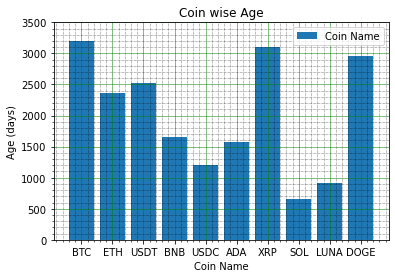

In [188]:
# Create the plot and add a label for the legend.
x_axis = Age_df["Symbol"]
y_axis = Age_df["Age_days"]
plt.bar(x_axis, y_axis, label='Coin Name')
# Create labels for the x and y axes.
plt.xlabel("Coin Name")
plt.ylabel("Age (days)")
# Set the y limit between 0 and 3500.
plt.ylim(0, 3500)
# Create a title.
plt.title("Coin wise Age")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Add the legend.
plt.legend()

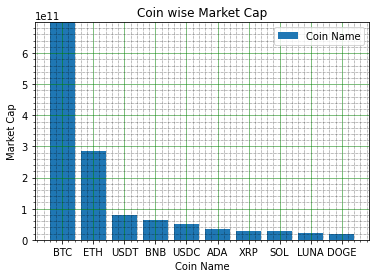

In [201]:
# Create the plot and add a label for the legend.
x_axis = Top_market_cap_currencies_df["Symbol"]
y_axis = Top_market_cap_currencies_df["Market_cap"]
plt.bar(x_axis, y_axis, label='Coin Name')
# Create labels for the x and y axes.
plt.xlabel("Coin Name")
plt.ylabel("Market Cap")
# Set the y limit between 0 and 3500.
plt.ylim(0, (6.987511e+11))
# Create a title.
plt.title("Coin wise Market Cap")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Add the legend.
plt.legend()

In [154]:
# create supply df
Top_coin_supply_df = Top_market_cap_currencies_df[["Symbol", "Total_supply", "Circulating_supply"]]
Top_coin_supply_df

,Symbol,Total_supply,Circulating_supply
0,BTC,1.894166e+07,1.894166e+07
1,ETH,1.193392e+08,1.193392e+08
2,USDT,8.007489e+10,7.816863e+10
3,BNB,1.651168e+08,1.651168e+08
4,USDC,4.946896e+10,4.946896e+10
5,ADA,3.402742e+10,3.355305e+10
6,XRP,9.998980e+10,4.773692e+10
7,SOL,5.116169e+08,3.149669e+08
8,LUNA,8.187020e+08,4.009451e+08
9,DOGE,1.326708e+11,1.326708e+11


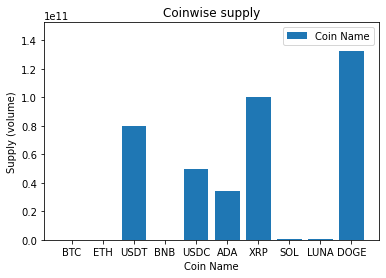

In [189]:
# Bar graph for supply of currencies
# Create the plot and add a label for the legend.
x_axis = Top_coin_supply_df["Symbol"]
y_axis = Top_coin_supply_df["Total_supply"]
plt.bar(x_axis, y_axis, label='Coin Name')
# Create labels for the x and y axes.
plt.xlabel("Coin Name")
plt.ylabel("Supply (volume)")
# Set the y limit between 0 and 3500.
plt.ylim(0, 1.526708e+11)
# Create a title.
plt.title("Coinwise supply")
# plt.minorticks_on()
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Add the legend.
plt.legend()
plt.show()

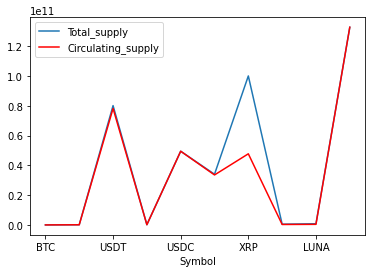

In [180]:
ax = plt.gca()

Top_coin_supply_df.plot(kind='line',x='Symbol',y="Total_supply",ax=ax)
Top_coin_supply_df.plot(kind='line',x='Symbol',y="Circulating_supply", color='red', ax=ax)

plt.show()

In [166]:
#Percentage df
Top_coin_percent_df = Top_market_cap_currencies_df[["Symbol", "Percent_change_1h", "Percent_change_24h", "Percent_change_7d", "Percent_change_30d", "Percent_change_60d", "Percent_change_90d"]]
Top_coin_percent_df

,Symbol,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d
0,BTC,-0.702181,1.824137,-7.569169,-22.939442,-35.998207,-40.550818
1,ETH,-0.898931,-0.829766,-17.902618,-37.080283,-44.630067,-45.139131
2,USDT,0.006794,-0.035229,0.018034,-0.008553,-0.020633,0.033029
3,BNB,-1.436564,3.917224,-10.072202,-28.290239,-37.164207,-27.978262
4,USDC,-0.009512,-0.056757,0.023181,-0.086752,-0.025696,-0.024486
5,ADA,-0.923525,-0.815733,-15.784593,-26.756647,-35.573904,-48.380937
6,XRP,-0.757841,-0.327140,-14.570573,-30.051857,-38.204927,-43.915739
7,SOL,0.669875,0.009221,-26.750331,-49.891884,-55.441353,-54.596691
8,LUNA,-0.927393,-6.914181,-30.624804,-39.126195,6.209979,19.111044
9,DOGE,-0.798025,-0.905883,-7.927950,-20.552098,-32.298939,-50.761949


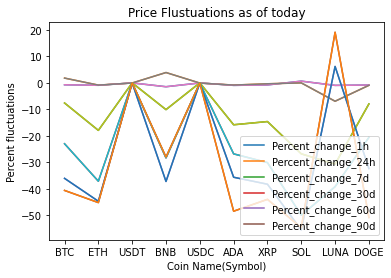

In [176]:
Top_coin_percent_df.plot()
plt.legend(loc='lower right')
plt.title("Price Flustuations as of today")
plt.xlabel("Coin Name(Symbol)")
plt.ylabel("Percent fluctuations")
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_1h)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_24h)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_7d)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_30d)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_60d)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_90d)
plt.show()

In [53]:
# Top 10 currencies based on max supply
Top_total_supply_currencies_df = final_crypto_data_df.sort_values(by = ["Total_supply"], ascending = False)
Top_total_supply_currencies_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,Circulating_supply,Total_supply,cmc_rank,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
13,5994,Shiba Inu,SHIB,shiba-inu,297,2020-08-01T00:00:00.000Z,"[memes, doggone-doggerel]",5.490633e+14,5.897350e+14,14,...,-0.620319,1.340467,-4.772618,-13.232534,-35.950604,1.339511,1.545480e+10,0.7666,1.659961e+10,2022-01-20T20:29:00.000Z
62,10791,eCash,XEC,ecash,46,2021-07-08T00:00:00.000Z,[],1.895680e+13,1.889970e+13,63,...,-0.392367,1.943967,-0.724762,-13.067080,-44.332737,-49.108152,1.804783e+09,0.0895,1.999307e+09,2022-01-20T20:29:00.000Z
53,3718,BitTorrent,BTT,bittorrent,166,2019-01-31T00:00:00.000Z,"[platform, distributed-computing, filesharing,...",9.900000e+11,9.900000e+11,54,...,-0.029414,-3.542387,-0.919557,-6.666803,-27.457473,-31.270125,2.473200e+09,0.1227,2.473200e+09,2022-01-20T20:29:00.000Z
90,2682,Holo,HOT,holo,99,2018-04-29T00:00:00.000Z,"[platform, distributed-computing, filesharing,...",1.731366e+11,1.776194e+11,91,...,-0.372089,0.780331,-4.936081,-26.811303,-58.233846,-38.994919,1.011890e+09,0.0502,1.038090e+09,2022-01-20T20:29:00.000Z
10,74,Dogecoin,DOGE,dogecoin,442,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",1.326708e+11,1.326708e+11,11,...,-0.545508,1.018593,-1.324710,-2.638034,-27.641285,-34.134647,2.188185e+10,1.0854,2.188185e+10,2022-01-20T20:29:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,317,2019-01-30T00:00:00.000Z,"[medium-of-exchange, defi, wrapped-tokens, fan...",2.637832e+05,2.637832e+05,18,...,-0.475847,2.278631,0.427225,-10.673552,-27.336147,-29.659598,1.130707e+10,0.5608,1.130707e+10,2022-01-20T20:29:00.000Z
36,4023,Bitcoin BEP2,BTCB,bitcoin-bep2,99,2019-06-18T00:00:00.000Z,"[binance-chain, binance-smart-chain]",1.050966e+05,1.125010e+05,37,...,-0.271565,2.308762,0.810382,-11.734724,-27.970990,-29.913889,4.501694e+09,0.2233,4.818854e+09,2022-01-20T20:29:00.000Z
83,5864,yearn.finance,YFI,yearn-finance,247,2020-07-18T00:00:00.000Z,"[defi, yield-farming, binance-smart-chain, yie...",3.663772e+04,3.666600e+04,84,...,-0.615256,3.179315,5.066808,-4.052517,3.459307,-3.378829,1.218506e+09,0.0604,1.219447e+09,2022-01-20T20:29:00.000Z
98,5777,renBTC,RENBTC,renbtc,35,2020-06-28T00:00:00.000Z,"[defi, binance-smart-chain, wrapped-tokens, fa...",1.810595e+04,1.810595e+04,99,...,-0.383743,2.913191,0.421574,-10.521251,-27.118030,-29.277990,7.780795e+08,0.0386,5.886537e+08,2022-01-20T20:29:00.000Z


In [54]:
# Top 10 currencies based on # circulating supply
Top_circulating_supply_currencies_df = final_crypto_data_df.sort_values(by = ["Circulating_supply"], ascending = False)
Top_circulating_supply_currencies_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,Circulating_supply,Total_supply,cmc_rank,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
13,5994,Shiba Inu,SHIB,shiba-inu,297,2020-08-01T00:00:00.000Z,"[memes, doggone-doggerel]",5.490633e+14,5.897350e+14,14,...,-0.620319,1.340467,-4.772618,-13.232534,-35.950604,1.339511,1.545480e+10,0.7666,1.659961e+10,2022-01-20T20:29:00.000Z
62,10791,eCash,XEC,ecash,46,2021-07-08T00:00:00.000Z,[],1.895680e+13,1.889970e+13,63,...,-0.392367,1.943967,-0.724762,-13.067080,-44.332737,-49.108152,1.804783e+09,0.0895,1.999307e+09,2022-01-20T20:29:00.000Z
53,3718,BitTorrent,BTT,bittorrent,166,2019-01-31T00:00:00.000Z,"[platform, distributed-computing, filesharing,...",9.900000e+11,9.900000e+11,54,...,-0.029414,-3.542387,-0.919557,-6.666803,-27.457473,-31.270125,2.473200e+09,0.1227,2.473200e+09,2022-01-20T20:29:00.000Z
90,2682,Holo,HOT,holo,99,2018-04-29T00:00:00.000Z,"[platform, distributed-computing, filesharing,...",1.731366e+11,1.776194e+11,91,...,-0.372089,0.780331,-4.936081,-26.811303,-58.233846,-38.994919,1.011890e+09,0.0502,1.038090e+09,2022-01-20T20:29:00.000Z
10,74,Dogecoin,DOGE,dogecoin,442,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",1.326708e+11,1.326708e+11,11,...,-0.545508,1.018593,-1.324710,-2.638034,-27.641285,-34.134647,2.188185e+10,1.0854,2.188185e+10,2022-01-20T20:29:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1518,Maker,MKR,maker,229,2017-01-29T00:00:00.000Z,"[store-of-value, defi, dao, binance-smart-chai...",9.845311e+05,9.845311e+05,60,...,-0.726147,-0.339350,-3.715296,-16.635353,-32.244297,-19.978901,1.988509e+09,0.0986,2.031016e+09,2022-01-20T20:29:00.000Z
17,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,317,2019-01-30T00:00:00.000Z,"[medium-of-exchange, defi, wrapped-tokens, fan...",2.637832e+05,2.637832e+05,18,...,-0.475847,2.278631,0.427225,-10.673552,-27.336147,-29.659598,1.130707e+10,0.5608,1.130707e+10,2022-01-20T20:29:00.000Z
36,4023,Bitcoin BEP2,BTCB,bitcoin-bep2,99,2019-06-18T00:00:00.000Z,"[binance-chain, binance-smart-chain]",1.050966e+05,1.125010e+05,37,...,-0.271565,2.308762,0.810382,-11.734724,-27.970990,-29.913889,4.501694e+09,0.2233,4.818854e+09,2022-01-20T20:29:00.000Z
83,5864,yearn.finance,YFI,yearn-finance,247,2020-07-18T00:00:00.000Z,"[defi, yield-farming, binance-smart-chain, yie...",3.663772e+04,3.666600e+04,84,...,-0.615256,3.179315,5.066808,-4.052517,3.459307,-3.378829,1.218506e+09,0.0604,1.219447e+09,2022-01-20T20:29:00.000Z


In [55]:
# Highest percentage change in 90 days
Top_Percent_90d_df = final_crypto_data_df.sort_values(by = ["Percent_change_90d"], ascending = False)
Top_Percent_90d_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,Circulating_supply,Total_supply,cmc_rank,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
39,6210,The Sandbox,SAND,the-sandbox,182,2020-08-05T00:00:00.000Z,"[collectibles-nfts, content-creation, gaming, ...",9.210733e+08,3.000000e+09,40,...,-0.733782,1.698700,-10.913765,-14.447228,10.831046,474.004469,4.004348e+09,0.1986,1.304244e+10,2022-01-20T20:29:00.000Z
97,3801,BORA,BORA,bora,4,2019-03-18T00:00:00.000Z,"[marketplace, gaming, wallet]",8.612500e+08,1.205750e+09,98,...,0.018241,7.847317,-3.514151,-12.925181,-15.985123,342.424323,7.857278e+08,0.0390,1.100019e+09,2022-01-20T20:29:00.000Z
31,1966,Decentraland,MANA,decentraland,227,2017-09-17T00:00:00.000Z,"[platform, collectibles-nfts, gaming, payments...",1.824513e+09,2.193878e+09,32,...,-0.879460,1.661790,-2.526272,-13.049570,-21.985277,262.472108,5.193285e+09,0.2576,6.244644e+09,2022-01-20T20:29:00.000Z
58,7080,Gala,GALA,gala,107,2020-09-16T00:00:00.000Z,"[collectibles-nfts, gaming, polygon-ecosystem,...",6.977205e+09,3.524011e+10,59,...,-1.016399,0.085720,-13.100471,-34.132295,-22.552464,242.469971,1.995396e+09,0.0990,1.007824e+10,2022-01-20T20:29:00.000Z
70,1934,Loopring,LRC,loopring,168,2017-08-30T00:00:00.000Z,"[marketplace, decentralized-exchange, defi, sc...",1.329247e+09,1.373873e+09,71,...,-1.522255,-1.904302,-21.908492,-48.686550,-51.348240,188.444623,1.583092e+09,0.0785,1.637003e+09,2022-01-20T20:29:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,3155,Quant,QNT,quant,72,2018-08-10T00:00:00.000Z,"[platform, interoperability]",1.207274e+07,1.461249e+07,64,...,-0.735329,7.150523,-12.549354,-17.397702,-36.250966,-48.998986,1.769705e+09,0.0878,2.141999e+09,2022-01-20T20:29:00.000Z
62,10791,eCash,XEC,ecash,46,2021-07-08T00:00:00.000Z,[],1.895680e+13,1.889970e+13,63,...,-0.392367,1.943967,-0.724762,-13.067080,-44.332737,-49.108152,1.804783e+09,0.0895,1.999307e+09,2022-01-20T20:29:00.000Z
76,1274,Waves,WAVES,waves,156,2016-06-02T00:00:00.000Z,"[lpos, platform, smart-contracts]",1.072768e+08,1.072768e+08,77,...,-0.773703,0.461939,-5.515442,-15.221895,-38.034763,-51.828322,1.434186e+09,0.0711,1.434186e+09,2022-01-20T20:29:00.000Z
37,2280,Filecoin,FIL,filecoin,166,2017-12-13T00:00:00.000Z,"[mineable, distributed-computing, filesharing,...",1.511396e+08,1.511396e+08,38,...,-0.828350,-0.086370,-3.383478,-20.548451,-47.868558,-57.398269,4.238032e+09,0.2102,4.238032e+09,2022-01-20T20:29:00.000Z


In [56]:
Top_Percent_60d_df = final_crypto_data_df.sort_values(by = ["Percent_change_60d"], ascending = False)
Top_Percent_60d_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,Circulating_supply,Total_supply,cmc_rank,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
8,4172,Terra,LUNA,terra-luna,133,2019-07-26T00:00:00.000Z,"[cosmos-ecosystem, store-of-value, defi, payme...",3.570076e+08,8.250911e+08,9,...,-0.466672,3.836645,4.881326,-5.393111,89.392270,84.816041,2.968122e+10,1.4722,6.859717e+10,2022-01-20T20:29:00.000Z
19,6535,NEAR Protocol,NEAR,near-protocol,91,2020-08-11T00:00:00.000Z,"[platform, staking, binance-smart-chain, coinb...",6.178558e+08,1.000000e+09,20,...,-2.386396,0.156765,-13.877221,89.003165,73.081568,83.958805,1.040465e+10,0.5161,1.683993e+10,2022-01-20T20:29:00.000Z
25,3513,Fantom,FTM,fantom,220,2018-10-29T00:00:00.000Z,"[platform, enterprise-solutions, defi, researc...",2.545006e+09,2.545006e+09,26,...,-1.498550,1.169284,-0.676636,101.537138,38.889208,10.573155,7.409861e+09,0.3675,9.244106e+09,2022-01-20T20:29:00.000Z
12,3890,Polygon,MATIC,polygon,311,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, scaling, stat...",7.442893e+09,1.000000e+10,13,...,-1.109170,2.389348,-5.862415,-6.827263,31.661331,40.704139,1.589821e+10,0.7886,2.136026e+10,2022-01-20T20:29:00.000Z
16,3794,Cosmos,ATOM,cosmos,226,2019-03-14T00:00:00.000Z,"[platform, cosmos-ecosystem, content-creation,...",2.863703e+08,0.000000e+00,17,...,-1.964508,9.271661,5.381984,74.965488,29.995589,18.704762,1.165307e+10,0.5780,0.000000e+00,2022-01-20T20:29:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1934,Loopring,LRC,loopring,168,2017-08-30T00:00:00.000Z,"[marketplace, decentralized-exchange, defi, sc...",1.329247e+09,1.373873e+09,71,...,-1.522255,-1.904302,-21.908492,-48.686550,-51.348240,188.444623,1.583092e+09,0.0785,1.637003e+09,2022-01-20T20:29:00.000Z
54,4558,Flow,FLOW,flow,55,2021-01-27T00:00:00.000Z,"[collectibles-nfts, coinbase-ventures-portfoli...",3.180824e+08,1.378212e+09,55,...,-1.889841,-2.810437,-8.306618,-13.786626,-52.107762,-47.168444,2.275716e+09,0.1129,9.860397e+09,2022-01-20T20:29:00.000Z
80,5647,Kadena,KDA,kadena,16,2020-05-31T00:00:00.000Z,"[mineable, pow, blake2s, platform, cosmos-ecos...",1.672574e+08,1.000000e+09,81,...,-3.259326,4.675611,-19.719160,-29.146331,-56.383483,116.919819,1.299852e+09,0.0645,7.771568e+09,2022-01-20T20:29:00.000Z
42,6892,Elrond,EGLD,elrond-egld,71,2020-09-04T00:00:00.000Z,"[binance-smart-chain, binance-launchpad, binan...",2.021688e+07,2.301630e+07,43,...,-1.259798,4.085959,-8.586646,-25.017239,-56.831232,-33.659933,3.647028e+09,0.1809,5.667283e+09,2022-01-20T20:29:00.000Z


In [57]:
# Highest percentage change in 30 days
Top_Percent_30d_df = final_crypto_data_df.sort_values(by = ["Percent_change_30d"], ascending = False)
Top_Percent_30d_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,Circulating_supply,Total_supply,cmc_rank,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
25,3513,Fantom,FTM,fantom,220,2018-10-29T00:00:00.000Z,"[platform, enterprise-solutions, defi, researc...",2.545006e+09,2.545006e+09,26,...,-1.498550,1.169284,-0.676636,101.537138,38.889208,10.573155,7.409861e+09,0.3675,9.244106e+09,2022-01-20T20:29:00.000Z
81,5604,Secret,SCRT,secret,26,2020-05-19T00:00:00.000Z,"[cosmos-ecosystem, defi, privacy]",1.498157e+08,1.901651e+08,82,...,-1.017694,-6.725179,27.389356,95.842062,11.145221,34.864347,1.271837e+09,0.0631,1.614376e+09,2022-01-20T20:29:00.000Z
19,6535,NEAR Protocol,NEAR,near-protocol,91,2020-08-11T00:00:00.000Z,"[platform, staking, binance-smart-chain, coinb...",6.178558e+08,1.000000e+09,20,...,-2.386396,0.156765,-13.877221,89.003165,73.081568,83.958805,1.040465e+10,0.5161,1.683993e+10,2022-01-20T20:29:00.000Z
68,7653,Oasis Network,ROSE,oasis-network,38,2020-11-12T00:00:00.000Z,"[cosmos-ecosystem, collectibles-nfts, defi, pr...",3.493014e+09,1.000000e+10,69,...,-1.567358,0.835203,-5.721265,81.607613,12.643147,153.254943,1.636459e+09,0.0812,4.684948e+09,2022-01-20T20:29:00.000Z
16,3794,Cosmos,ATOM,cosmos,226,2019-03-14T00:00:00.000Z,"[platform, cosmos-ecosystem, content-creation,...",2.863703e+08,0.000000e+00,17,...,-1.964508,9.271661,5.381984,74.965488,29.995589,18.704762,1.165307e+10,0.5780,0.000000e+00,2022-01-20T20:29:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2682,Holo,HOT,holo,99,2018-04-29T00:00:00.000Z,"[platform, distributed-computing, filesharing,...",1.731366e+11,1.776194e+11,91,...,-0.372089,0.780331,-4.936081,-26.811303,-58.233846,-38.994919,1.011890e+09,0.0502,1.038090e+09,2022-01-20T20:29:00.000Z
11,5805,Avalanche,AVAX,avalanche,169,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, binance-smart-chain, p...",2.443499e+08,3.958913e+08,12,...,-0.974510,1.806236,-6.019763,-27.382823,-35.408482,32.477117,2.091941e+10,1.0376,3.389324e+10,2022-01-20T20:29:00.000Z
80,5647,Kadena,KDA,kadena,16,2020-05-31T00:00:00.000Z,"[mineable, pow, blake2s, platform, cosmos-ecos...",1.672574e+08,1.000000e+09,81,...,-3.259326,4.675611,-19.719160,-29.146331,-56.383483,116.919819,1.299852e+09,0.0645,7.771568e+09,2022-01-20T20:29:00.000Z
58,7080,Gala,GALA,gala,107,2020-09-16T00:00:00.000Z,"[collectibles-nfts, gaming, polygon-ecosystem,...",6.977205e+09,3.524011e+10,59,...,-1.016399,0.085720,-13.100471,-34.132295,-22.552464,242.469971,1.995396e+09,0.0990,1.007824e+10,2022-01-20T20:29:00.000Z


In [67]:
# Highest percentage change in 7 days
Top_Percent_7d_df = final_crypto_data_df.sort_values(by = ["Percent_change_7d"], ascending = False)
Top_Percent_7d_df

,index,id,name,symbol,slug,num_market_pairs,date_added,tags,Circulating_supply,Total_supply,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
81,81,5604,Secret,SCRT,secret,26,2020-05-19T00:00:00.000Z,"[cosmos-ecosystem, defi, privacy]",1.498157e+08,1.901651e+08,...,-1.017694,-6.725179,27.389356,95.842062,11.145221,34.864347,1.271837e+09,0.0631,1.614376e+09,2022-01-20T20:29:00.000Z
91,91,1168,Decred,DCR,decred,56,2016-02-10T00:00:00.000Z,"[mineable, hybrid-pow-pos, blake256, medium-of...",1.369389e+07,1.369389e+07,...,2.490146,2.959391,21.637188,1.120445,-37.363046,-44.394146,9.544016e+08,0.0473,1.463605e+09,2022-01-20T20:29:00.000Z
28,28,4195,FTX Token,FTT,ftx-token,107,2019-07-31T00:00:00.000Z,"[marketplace, centralized-exchange, derivative...",1.384728e+08,3.343422e+08,...,-1.000004,5.345144,18.593187,16.612364,-6.927243,-23.768755,6.729437e+09,0.3338,1.711459e+10,2022-01-20T20:29:00.000Z
85,85,3822,Theta Fuel,TFUEL,theta-fuel,26,2019-03-28T00:00:00.000Z,"[media, content-creation, payments]",5.301214e+09,5.301214e+09,...,-0.541985,-3.261698,15.795832,-0.055125,-40.352986,-35.003014,1.044193e+09,0.0518,1.044193e+09,2022-01-20T20:29:00.000Z
34,34,2416,Theta Network,THETA,theta-network,95,2018-01-17T00:00:00.000Z,"[media, collectibles-nfts, content-creation, v...",1.000000e+09,1.000000e+09,...,0.245826,4.904123,14.152441,12.141023,-35.146640,-31.145135,4.594430e+09,0.2279,4.594430e+09,2022-01-20T20:29:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,6538,Curve DAO Token,CRV,curve-dao-token,223,2020-08-14T00:00:00.000Z,"[decentralized-exchange, defi, dao, yield-farm...",4.523884e+08,1.674074e+09,...,-0.639033,2.820366,-14.018166,0.797515,15.745457,38.239791,2.010848e+09,0.0997,1.468183e+10,2022-01-20T20:29:00.000Z
30,30,8916,Internet Computer,ICP,internet-computer,95,2021-03-23T00:00:00.000Z,"[platform, distributed-computing, polychain-ca...",1.989363e+08,4.764602e+08,...,-0.959852,0.650314,-15.618335,19.591322,-38.337305,-39.314107,5.422177e+09,0.2689,1.298633e+10,2022-01-20T20:29:00.000Z
45,45,3945,Harmony,ONE,harmony,76,2019-06-01T00:00:00.000Z,"[platform, enterprise-solutions, scaling, smar...",1.159411e+10,1.332274e+10,...,-1.890935,-1.059442,-15.938361,21.989868,-5.867881,12.276678,3.351000e+09,0.1662,3.850620e+09,2022-01-20T20:29:00.000Z
80,80,5647,Kadena,KDA,kadena,16,2020-05-31T00:00:00.000Z,"[mineable, pow, blake2s, platform, cosmos-ecos...",1.672574e+08,1.000000e+09,...,-3.259326,4.675611,-19.719160,-29.146331,-56.383483,116.919819,1.299852e+09,0.0645,7.771568e+09,2022-01-20T20:29:00.000Z


In [59]:
# Highest percentage change in 24 hours
Top_Percent_24h_df = final_crypto_data_df.sort_values(by = ["Percent_change_24h"], ascending = False)
Top_Percent_24h_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,Circulating_supply,Total_supply,cmc_rank,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
96,7501,WOO Network,WOO,wootrade,82,2020-10-23T00:00:00.000Z,"[centralized-exchange, binance-smart-chain, ex...",8.840403e+08,2.990413e+09,97,...,-0.828795,12.824423,-7.465225,14.257820,-38.269412,-29.233106,7.867385e+08,0.0390,2.669805e+09,2022-01-20T20:29:00.000Z
16,3794,Cosmos,ATOM,cosmos,226,2019-03-14T00:00:00.000Z,"[platform, cosmos-ecosystem, content-creation,...",2.863703e+08,0.000000e+00,17,...,-1.964508,9.271661,5.381984,74.965488,29.995589,18.704762,1.165307e+10,0.5780,0.000000e+00,2022-01-20T20:29:00.000Z
97,3801,BORA,BORA,bora,4,2019-03-18T00:00:00.000Z,"[marketplace, gaming, wallet]",8.612500e+08,1.205750e+09,98,...,0.018241,7.847317,-3.514151,-12.925181,-15.985123,342.424323,7.857278e+08,0.0390,1.100019e+09,2022-01-20T20:29:00.000Z
63,3155,Quant,QNT,quant,72,2018-08-10T00:00:00.000Z,"[platform, interoperability]",1.207274e+07,1.461249e+07,64,...,-0.735329,7.150523,-12.549354,-17.397702,-36.250966,-48.998986,1.769705e+09,0.0878,2.141999e+09,2022-01-20T20:29:00.000Z
15,3635,Crypto.com Coin,CRO,crypto-com-coin,124,2018-12-14T00:00:00.000Z,"[medium-of-exchange, cosmos-ecosystem, central...",2.526301e+10,3.026301e+10,16,...,-0.788470,6.615898,0.805902,-11.026026,-40.018229,147.678862,1.167557e+10,0.5791,1.398637e+10,2022-01-20T20:29:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,4558,Flow,FLOW,flow,55,2021-01-27T00:00:00.000Z,"[collectibles-nfts, coinbase-ventures-portfoli...",3.180824e+08,1.378212e+09,55,...,-1.889841,-2.810437,-8.306618,-13.786626,-52.107762,-47.168444,2.275716e+09,0.1129,9.860397e+09,2022-01-20T20:29:00.000Z
85,3822,Theta Fuel,TFUEL,theta-fuel,26,2019-03-28T00:00:00.000Z,"[media, content-creation, payments]",5.301214e+09,5.301214e+09,86,...,-0.541985,-3.261698,15.795832,-0.055125,-40.352986,-35.003014,1.044193e+09,0.0518,1.044193e+09,2022-01-20T20:29:00.000Z
53,3718,BitTorrent,BTT,bittorrent,166,2019-01-31T00:00:00.000Z,"[platform, distributed-computing, filesharing,...",9.900000e+11,9.900000e+11,54,...,-0.029414,-3.542387,-0.919557,-6.666803,-27.457473,-31.270125,2.473200e+09,0.1227,2.473200e+09,2022-01-20T20:29:00.000Z
88,2777,IoTeX,IOTX,iotex,69,2018-05-25T00:00:00.000Z,"[platform, iot, binance-smart-chain, hashkey-c...",9.540779e+09,9.626124e+09,89,...,-1.056076,-3.551773,5.122988,-13.164869,-50.123674,58.571302,1.017854e+09,0.0505,1.066846e+09,2022-01-20T20:29:00.000Z


In [60]:
# Highest percentage change in 24 hours
Top_Percent_1h_df = final_crypto_data_df.sort_values(by = ["Percent_change_1h"], ascending = False)
Top_Percent_1h_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,Circulating_supply,Total_supply,cmc_rank,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
91,1168,Decred,DCR,decred,56,2016-02-10T00:00:00.000Z,"[mineable, hybrid-pow-pos, blake256, medium-of...",1.369389e+07,1.369389e+07,92,...,2.490146,2.959391,21.637188,1.120445,-37.363046,-44.394146,9.544016e+08,0.0473,1.463605e+09,2022-01-20T20:29:00.000Z
34,2416,Theta Network,THETA,theta-network,95,2018-01-17T00:00:00.000Z,"[media, collectibles-nfts, content-creation, v...",1.000000e+09,1.000000e+09,35,...,0.245826,4.904123,14.152441,12.141023,-35.146640,-31.145135,4.594430e+09,0.2279,4.594430e+09,2022-01-20T20:29:00.000Z
69,6945,Amp,AMP,amp,63,2020-09-08T00:00:00.000Z,[],4.222770e+10,9.921341e+10,70,...,0.206322,0.451312,-7.144380,-20.276836,-24.110081,-20.368198,1.616994e+09,0.0802,3.543857e+09,2022-01-20T20:29:00.000Z
32,4642,Hedera,HBAR,hedera,83,2019-09-17T00:00:00.000Z,"[dag, marketplace, enterprise-solutions, payme...",1.809279e+10,5.000000e+10,33,...,0.183391,5.277783,-0.615286,-9.381594,-29.261186,-27.159911,5.024974e+09,0.2492,1.388667e+10,2022-01-20T20:29:00.000Z
44,3957,UNUS SED LEO,LEO,unus-sed-leo,17,2019-05-21T00:00:00.000Z,"[marketplace, centralized-exchange, discount-t...",9.539541e+08,9.852395e+08,45,...,0.084224,0.676473,-3.891918,-0.644608,10.510286,8.433416,3.490963e+09,0.1732,3.605451e+09,2022-01-20T20:29:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,3945,Harmony,ONE,harmony,76,2019-06-01T00:00:00.000Z,"[platform, enterprise-solutions, scaling, smar...",1.159411e+10,1.332274e+10,46,...,-1.890935,-1.059442,-15.938361,21.989868,-5.867881,12.276678,3.351000e+09,0.1662,3.850620e+09,2022-01-20T20:29:00.000Z
16,3794,Cosmos,ATOM,cosmos,226,2019-03-14T00:00:00.000Z,"[platform, cosmos-ecosystem, content-creation,...",2.863703e+08,0.000000e+00,17,...,-1.964508,9.271661,5.381984,74.965488,29.995589,18.704762,1.165307e+10,0.5780,0.000000e+00,2022-01-20T20:29:00.000Z
50,4847,Stacks,STX,stacks,38,2019-10-28T00:00:00.000Z,"[arrington-xrp-capital-portfolio, blockchain-c...",1.294071e+09,1.352465e+09,51,...,-2.053121,-0.585380,3.607972,1.596020,-0.623197,-3.135418,2.767420e+09,0.1373,3.887862e+09,2022-01-20T20:29:00.000Z
19,6535,NEAR Protocol,NEAR,near-protocol,91,2020-08-11T00:00:00.000Z,"[platform, staking, binance-smart-chain, coinb...",6.178558e+08,1.000000e+09,20,...,-2.386396,0.156765,-13.877221,89.003165,73.081568,83.958805,1.040465e+10,0.5161,1.683993e+10,2022-01-20T20:29:00.000Z


# Exporting data to csv and Uploading on MongoDb

In [202]:
# exporting the dataframe to csv
final_crypto_data_df.to_csv('Latest_coinmarket_data.csv')
Top_market_cap_currencies_df.to_csv('Top_market_cap_currencies.csv')
Age_df.to_csv('Coin_Age.csv')

In [203]:
# Read in mongodb server location as client
client = MongoClient(mongo_uri,tlsCAFile=certifi.where())

In [204]:
# Find Databases
client.list_database_names()

['Kaggle_data', 'Latest_Cryptodata', 'Latest_StockMarket', 'admin', 'local']

In [205]:
# connecting to the db on MongoDb and creating collection in the db
db = client['Latest_Cryptodata']
collection = db['Latest_cryptomarket_data']

In [206]:
# drop collection to refresh with new data
collection.drop()

In [207]:
# adding dataframe to mongoDb
final_crypto_data_df.reset_index(inplace=True)
final_crypto_data_df_dict = final_crypto_data_df.to_dict("records")

In [208]:
# Insert collection
collection.insert_many(final_crypto_data_df_dict)